## <b> Write Up </b>

### 3a) A summary on the objectives, features of your application (one paragraph) 
### 3b) The dataset used, the source, the targets and the features.
### 3c) A summary of the results obtained (one-paragraph).
### 3d) Clear instructions on how to use your application (if appropriate, not required for Jupyter Notebook submissions).


3a) 

Since this is life or death matter. In my opinion it is okay to have slightly higher False-Positive Rates and make sure most or all of the True-Positives Rates Diabetic Patients are accounted for. It is okay to upset the Non-Diabetic Patients with False-Positive results as it does less harm as compared to False-Negative results which such judgements may cause a life. Thus, my hypothesis for this Dataset is that it will be in the High-Recall side.
The dataset taken from UCI had indicated that there were no missing indicators but I will do due deligence to understand the datasets clearer with numbers and visual-aids to make sense of it. To my understanding it should not make sense if there are ZEROs in any of the diagnosis attributes especially if it is a Blood Pressure attributes.

<hr>

3b)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, 
based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The web page indicated that there were no missing values in the dataset. As pointed out by a repository user, this cannot be true:<b> there are zeros in places </b> where they are biologically impossible, such as the blood pressure attribute. It seems very likely that zero values encode missing data. However, since the dataset donors made no such statement we encourage you to use your best judgement and state your assumptions.

<b>Data Attributes</b>
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Outcome (0 or 1)

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

<hr>

3c)

I had achieved a Best KNN Score of 0.7721840251252015 upon using Hyper Parameter Optimzation in the 25th range, whereas prior to optimization I had achieved Best KNN score of 0.7532467532467533 in the 11th range when selected the range between 1 : 15.
*The value of range is the total Outcome of Diabetic and Non-Diabetic patients that has been train_test & train_split.
My hypothesis has been met as the Recall score is the highest with the F1 score of 0.82.

<hr>

3d)

***Before Running the Jupyter Notebook

1. Make sure your are running Python 3.8.1.3
2. I have included the list of libraries to be installed in "requirements.txt"
3. Open Anaconda Prompt (Anaconda3)
4. Create a new environment with Python version stated in Step 1.
5. "Conda Activate" the created Environment in Step 4.
6. cd to the path where you have downloaded the zip file and extract the folder.
7. cd to "AIITP-02-MachineLearningGA_ILYAS"
8. In the specified conda environment, type "pip install -r requirements.txt", (without quotations).
9. Open Anaconda, use VSCode to easily switch to the newly create enviroment OR kernel and you can RUN ALL the codes.
10. I will copy this Write-Up to a seperate document for screenshots.



## Installation

In [178]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import os
data_path = ['data']

## Data Understanding

In [180]:
#Loading the dataset
filepath = os.sep.join(data_path + ['diabetes.csv']) #Import Data from database.
diabetes = pd.read_csv(filepath,  header = 0)

#View First 21 Rows.
diabetes.head(21)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [181]:
#Original Datasets

def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

show_info(diabetes)

DATASET SHAPE:  (768, 9) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

Pregnancies                  17
Glucose      

**DataFrame.describe()** method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the describe() method:
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [182]:
#Display summary statistics for dataframe's numeric columns.
#I chose to display extra features as it helps to detect outliers.

diabetes.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99])



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
10%,0.000000,85.000000,54.000000,0.000000,0.000000,23.600000,0.165000,22.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
90%,9.000000,167.000000,88.000000,40.000000,210.000000,41.500000,0.878600,51.000000,1.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000


In [183]:
#(.T) Flips the table for individual preferences.
diabetes.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


## Minimum from above data has a ZERO value which may be an indicator of missing value.

Columns that has an invalid ZERO value:
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI

## Replaced ZEROS with np.nan(Numpy.Not A Number) which is an undefined value. 

In [184]:
# Duplicate dataframe from original data (diabetes.csv) to (diabetes_mod) for this test assignment.
# Deep = True is is creating another independent copy which allows to modified and not affect the original.

diabetes_mod = diabetes.copy(deep = True)
diabetes_mod[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_mod[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_mod.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## (Before) converting to Nan values I will plot using histogram for more clarity on how the data are being distributed.

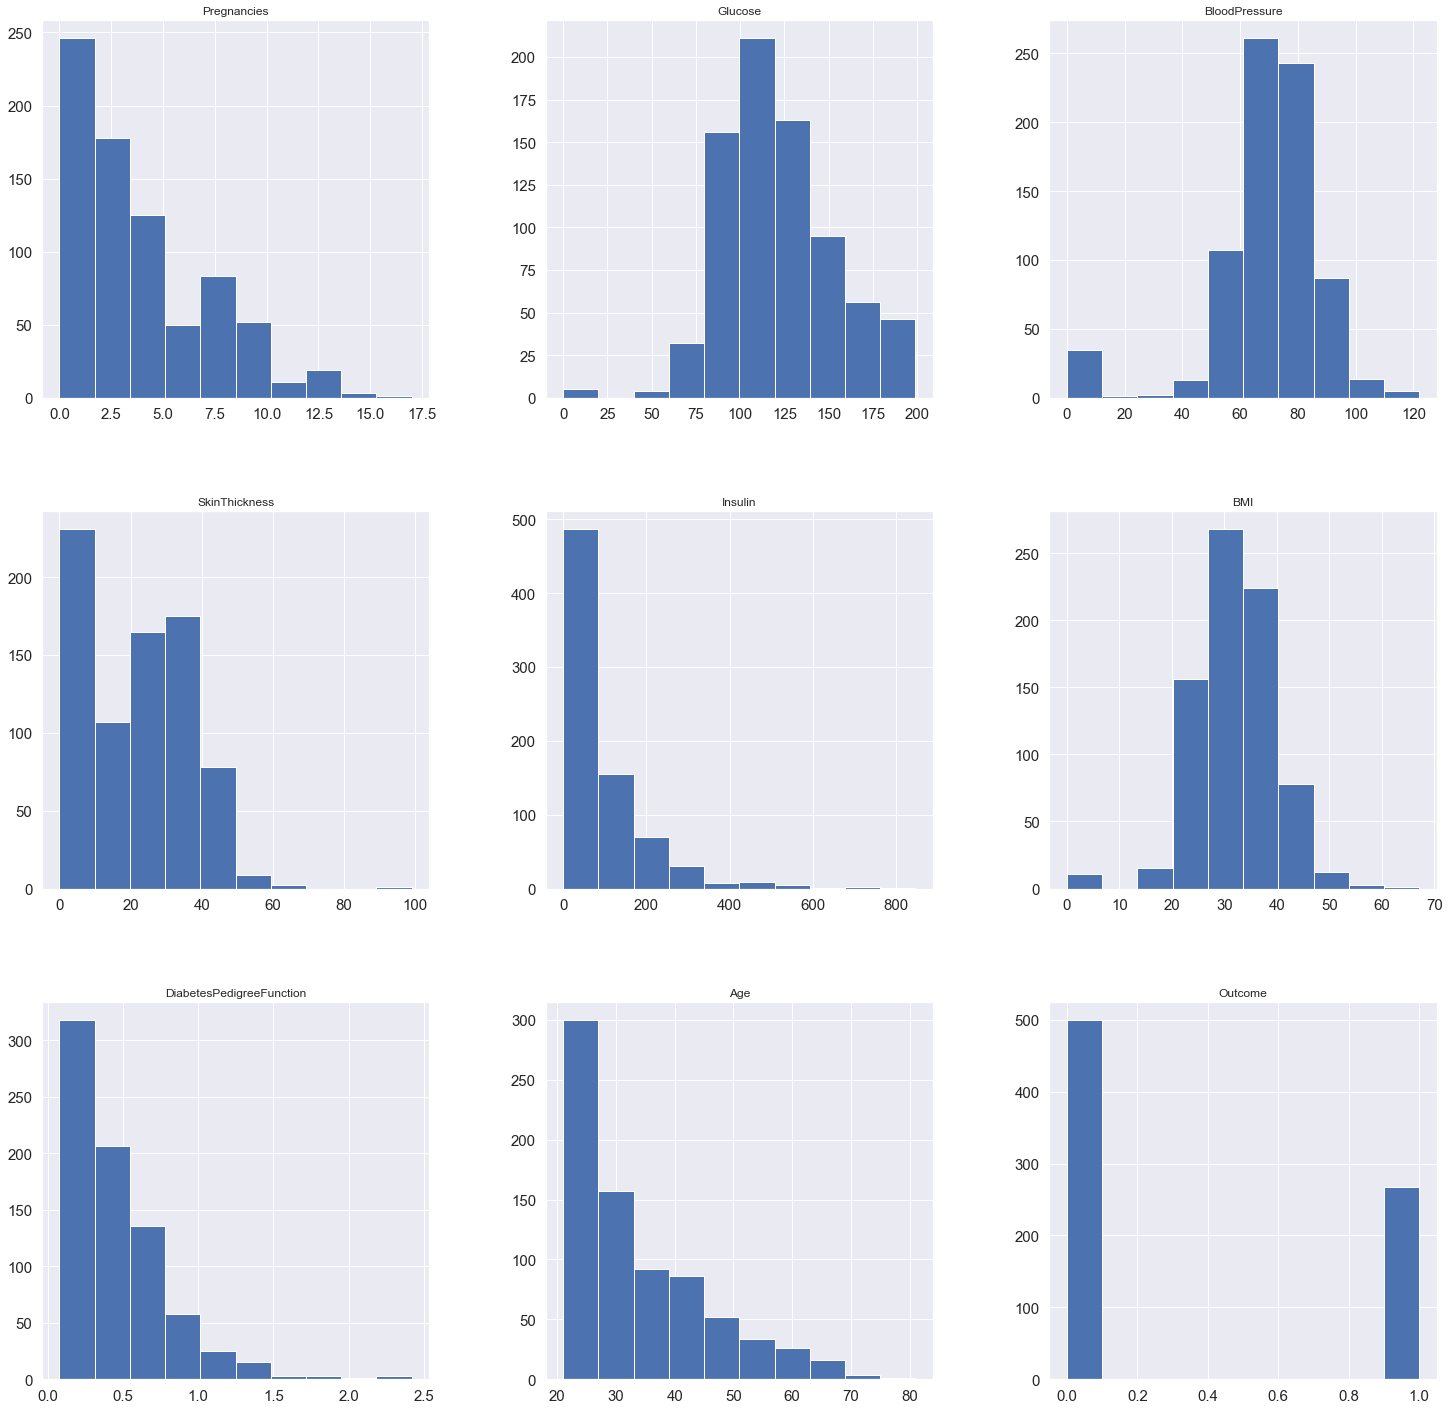

In [185]:
df = diabetes.hist(figsize = (25,25), xlabelsize=15, ylabelsize=15)

# Data Preparation

## Apply fillna (NaN) to the each of the targeted columns.

In [186]:
'''
# I chose to replace with mean method to "Glucose" and "BloodPressure" as the data are 
more closely knitted together and it is more accurate to give me the average.

# I chose to replace with median method to "SkinThickness", "Insulin", "BMI" as the data 
is skewed and sensitive to detect outliers. 
'''

diabetes_mod['Glucose'].fillna(diabetes_mod['Glucose'].mean(), inplace = True)
diabetes_mod['BloodPressure'].fillna(diabetes_mod['BloodPressure'].mean(), inplace = True)
diabetes_mod['SkinThickness'].fillna(diabetes_mod['SkinThickness'].median(), inplace = True)
diabetes_mod['Insulin'].fillna(diabetes_mod['Insulin'].median(), inplace = True)
diabetes_mod['BMI'].fillna(diabetes_mod['BMI'].median(), inplace = True)

## (After) converting ZEROS to NaN values.

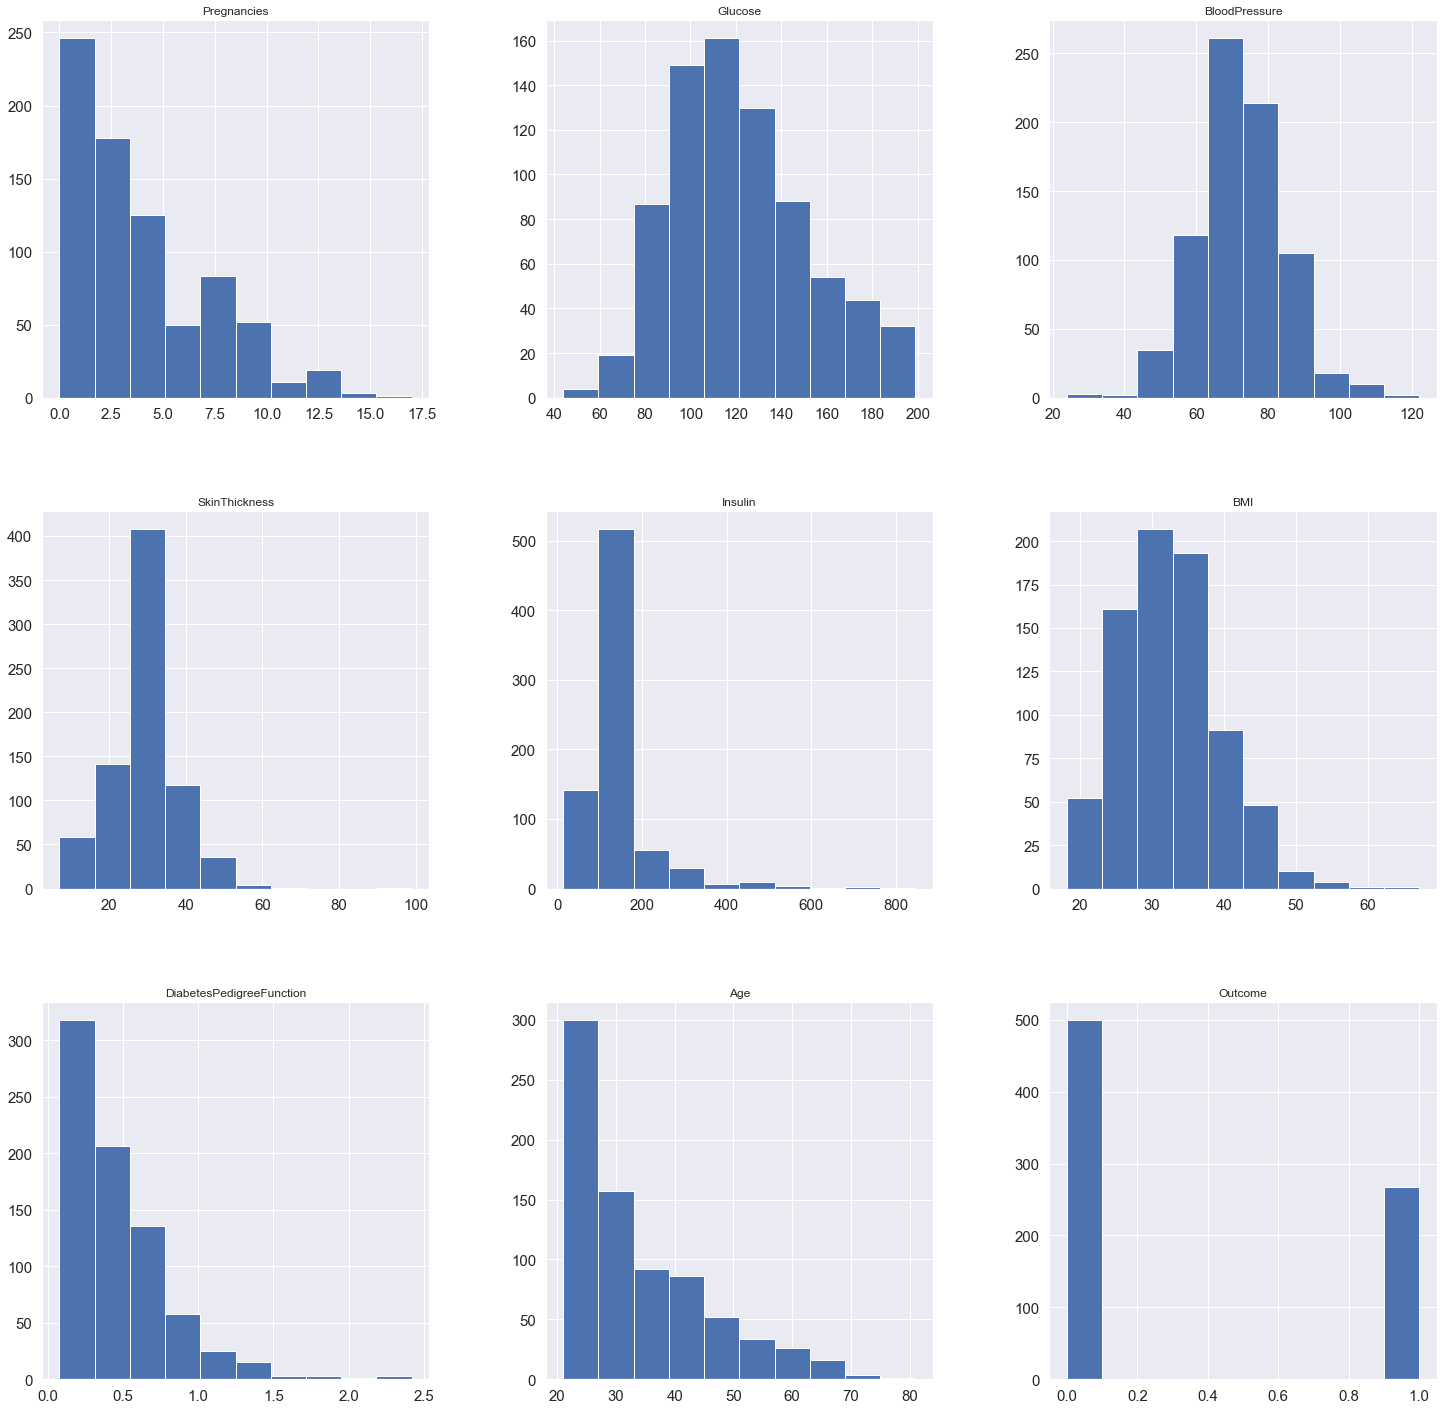

In [187]:
df = diabetes_mod.hist(figsize = (25,25), xlabelsize=15, ylabelsize=15)

In [188]:
# After applying fillna.
show_info(diabetes_mod)

DATASET SHAPE:  (768, 9) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None

 --------------------------------------------------
NUMBER OF UNIQUE VALUES PER FEATURE: 

Pregnancies                  17
Glucose      

In [189]:
#After applying fillna.
diabetes_mod.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T


,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.000000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,121.686763,30.435949,44.000,86.700,99.75000,117.000000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,58.000,64.00000,72.202592,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,18.000,25.00000,29.000000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,140.671875,86.383060,14.000,67.000,121.50000,125.000000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,32.455208,6.875177,18.200,24.000,27.50000,32.300000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.372500,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.000000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.000000,1.00000,1.0000,1.00000,1.00000,1.00


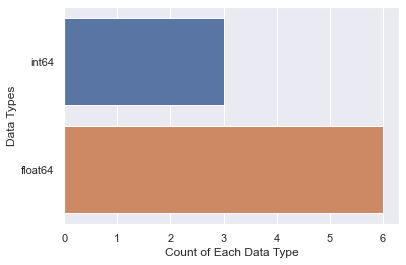

In [190]:
# Data Type analysis
# Original data has ZEROS after replacing with fillna in the INT64, ZEROS is converted to FLOAT64 in the modified columns.

sns.countplot(y=diabetes_mod.dtypes ,data=diabetes_mod)
plt.xlabel("Count of Each Data Type")
plt.ylabel("Data Types")
plt.show()

In [191]:
#Before applying fillna.
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [192]:
#After applying fillna.
diabetes_mod.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

0    500
1    268
Name: Outcome, dtype: int64


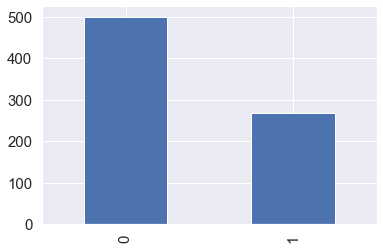

In [193]:
#Checking the balance of the data by plotting the count of outcomes by their value
print(diabetes_mod.Outcome.value_counts())
df2=diabetes_mod.Outcome.value_counts().plot(kind="bar", fontsize=15)


#### The "Outcome" column "0" and "1" represents "Non- Diabetic" and "Diabetic" patients respectively. The graph also pintpoints that it is biased towards the outcome value of "0" where "Non-Diabetic" patients are present.

## Pair Plot of Uncleaned Data

### The density plots on the diagonal make it easier to compare distributions.
### Applying Hue allows us to compare the Two variables which is the Outcome. It also allows us to read the overplotting with clarity.

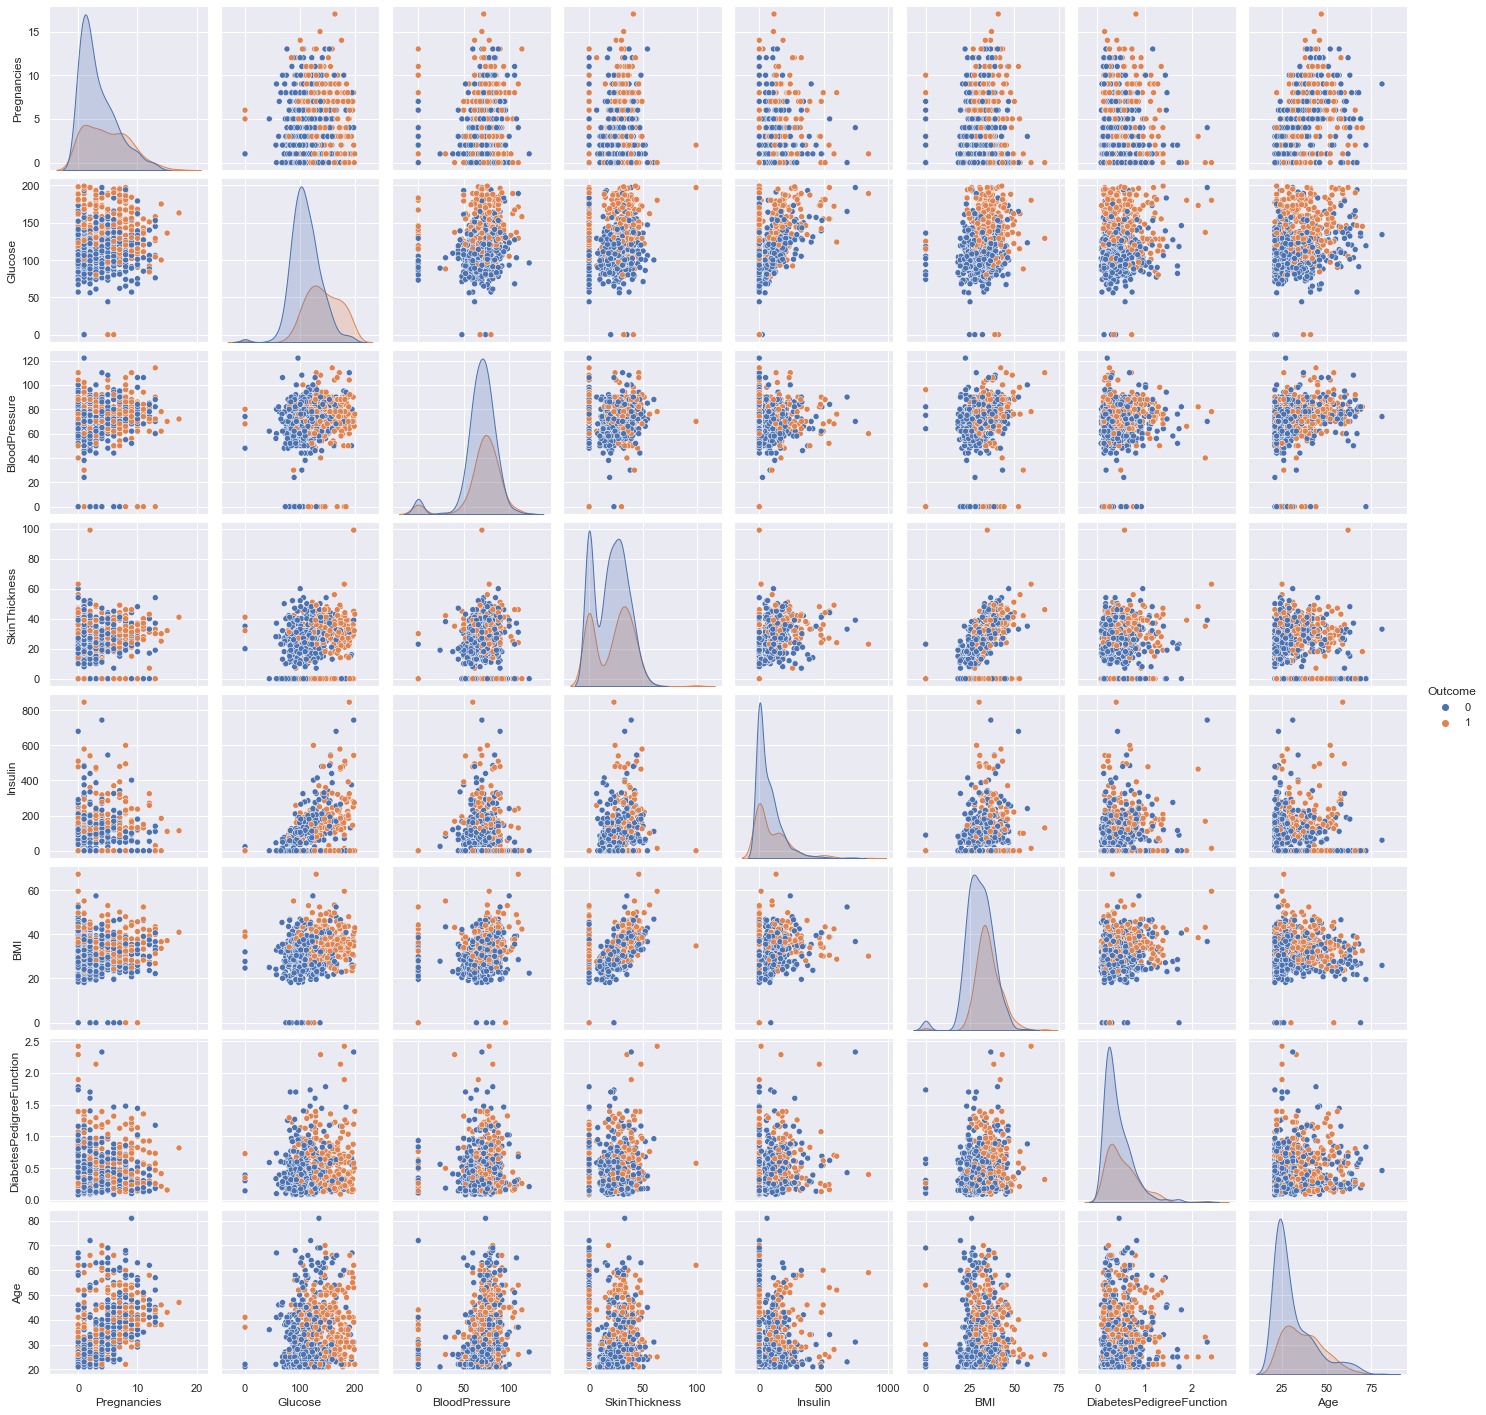

In [194]:
# Blue ticks : Non-Diabetic patients.
# Orange ticks : Diabetic patients.

df=sns.pairplot(diabetes, hue = 'Outcome', )

## Pair Plot for Cleaned Data.

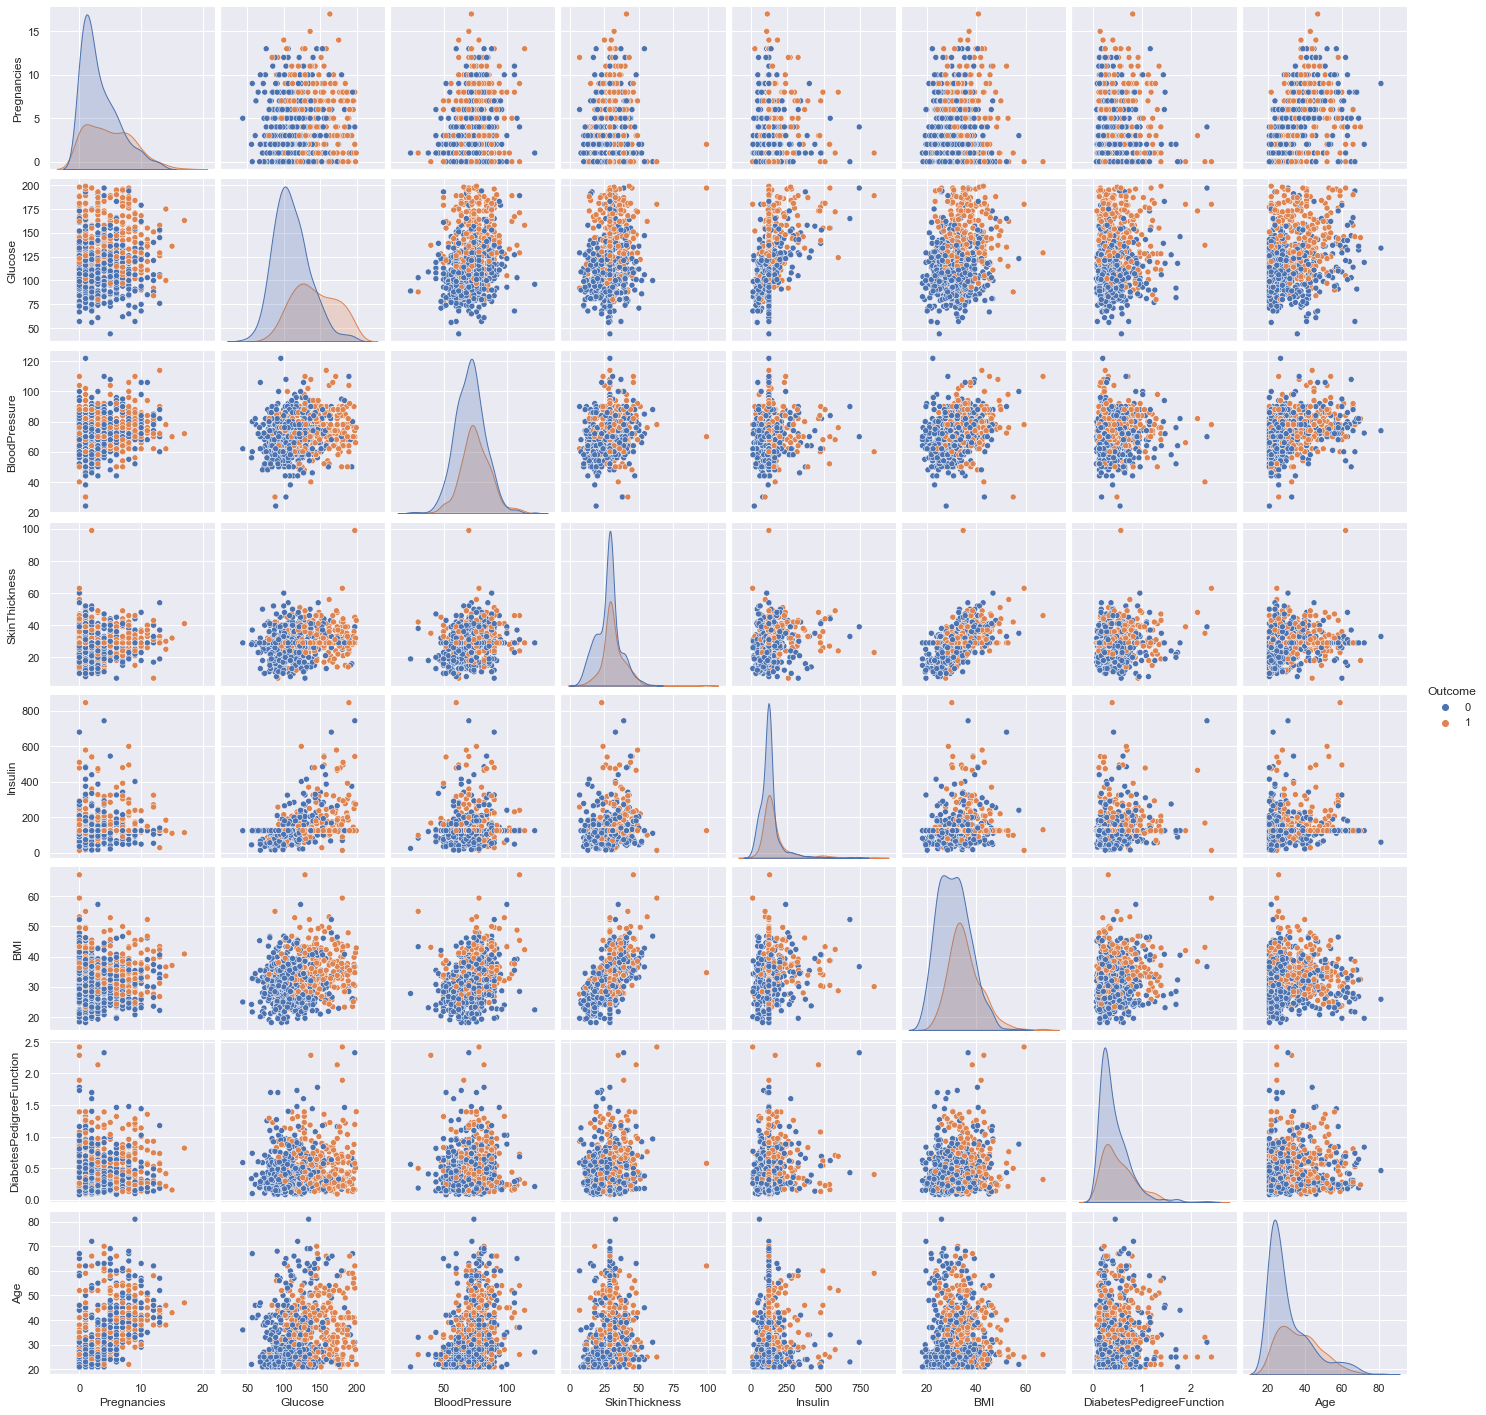

In [195]:
# Blue ticks : Non-Diabetic patients.
# Orange ticks : Diabetic patients.

df=sns.pairplot(diabetes_mod, hue = 'Outcome')

## Heatmap for Uncleaned Data

### I chose to represent Correlation Coefficient to find out the relationship between the two quantities in column "Outcome". The value of Correlation Coefficient can range between -1 to 1. 
### Having a value score of 1 means it is highly correlated and 0 means no correlation.

### For example: "Pregnancies" that are *diabetic* are strongly correlated to "Age". The correlation value is 0.54 which is the highest correlation value.

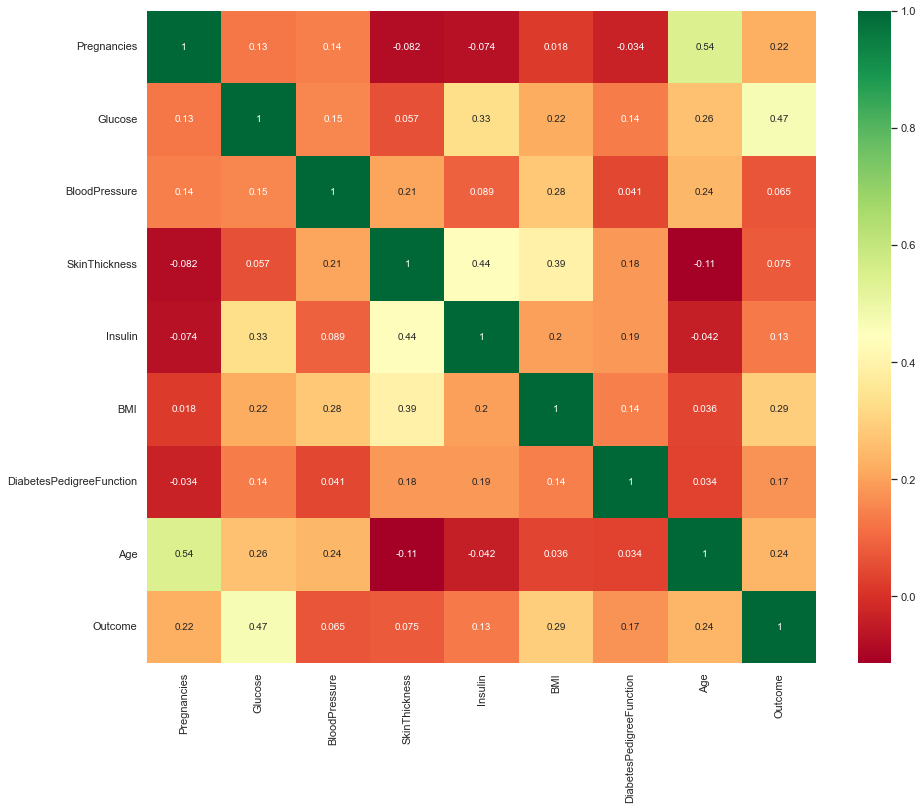

In [196]:
plt.figure(figsize=(15,12))
df=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn') 
#annot — when set to True, the correlation values become visible on the colored cells.

## Heatmap for Cleaned Data

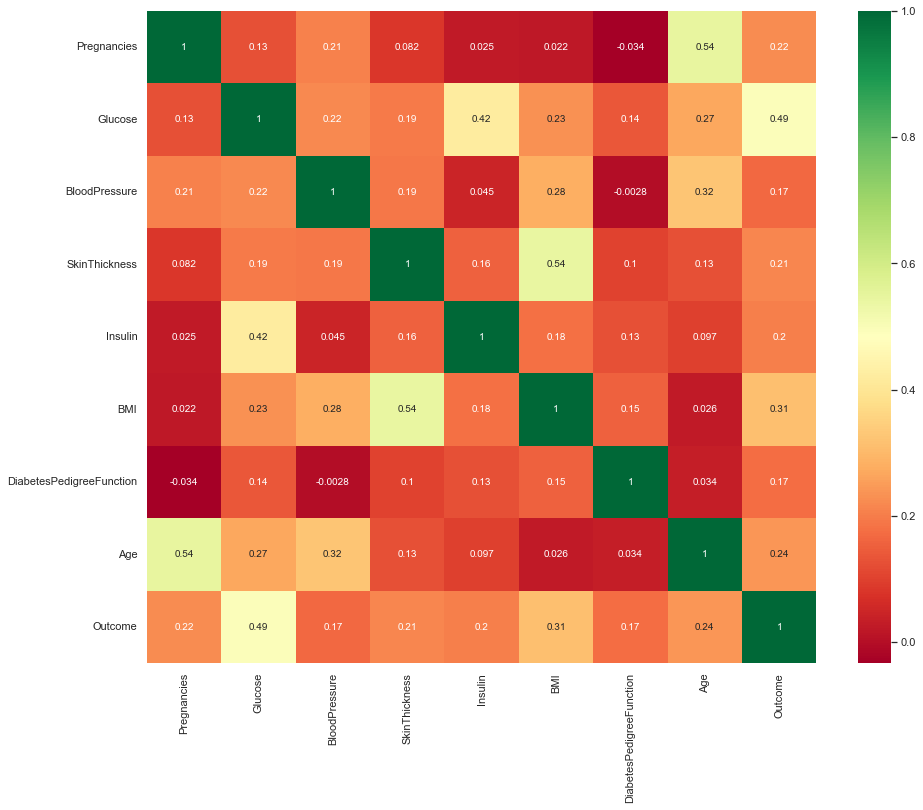

In [197]:
plt.figure(figsize=(15,12)) 
df=sns.heatmap(diabetes_mod.corr(), annot=True,cmap ='RdYlGn')

# Modelling
## Scaling the data
### The scaler is fit to the training features. Subsequently, this scaler is used to apply the same scaling to the test data and in production. 

In [198]:
from sklearn.preprocessing import StandardScaler
scaled_data_X = StandardScaler()
X =  pd.DataFrame(scaled_data_X.fit_transform(diabetes_mod.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [199]:
X.head(21)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-3.351824e-02,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-5.298590e-01,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-6.953060e-01,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-5.298590e-01,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669e+00,0.670643,0.316566,1.549303,5.484909,-0.020496
5,0.342981,-0.186965,1.319287e-01,-0.012301,-0.181541,-0.997745,-0.818079,-0.275760
6,-0.250952,-1.436303,-1.853434e+00,0.329171,-0.610145,-0.211799,-0.676133,-0.616111
7,1.827813,-0.219843,1.175571e-15,-0.012301,-0.181541,0.414047,-1.020427,-0.360847
8,-0.547919,2.476096,-1.989652e-01,1.808882,4.660524,-0.284572,-0.947944,1.681259
9,1.233880,0.108930,1.951845e+00,-0.012301,-0.181541,-0.022590,-0.724455,1.766346


In [200]:
y = diabetes_mod.Outcome

#### The features with the highest range will overshadow and deminish the smaller feature completely and impacts the performance for all distance based model as it will prioritize higher weightage to variables which have higher magnitude.

In [201]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

<b>Train Test Split</b> : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

<b>Cross Validation</b>: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

<b>About Stratify</b> : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's

In [202]:
y_train.value_counts(normalize=True)

0    0.651769
1    0.348231
Name: Outcome, dtype: float64

In [203]:
y_test.value_counts(normalize=True)

0    0.649351
1    0.350649
Name: Outcome, dtype: float64

In [204]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
training_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    training_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [205]:
# Scores from test sets of the datapoints are used for training sets.
maxed_train_score = max(training_scores)
trained_scores_index = [i for i, v in enumerate(training_scores) if v == maxed_train_score]
print('Maxed Trained Scores {} % and k = {}'.format(maxed_train_score*100,list(map(lambda x: x+1, trained_scores_index))))

Maxed Trained Scores 100.0 % and k = [1]


In [206]:
# Scores from test sets of the datapoints are split in the beginning to only be used for testing. 
maxed_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == maxed_test_score]
print('Maxed Test Scores {} % and k = {}'.format(maxed_test_score*100,list(map(lambda x: x+1, test_scores_index))))

Maxed Test Scores 75.32467532467533 % and k = [11]


# Evaluation

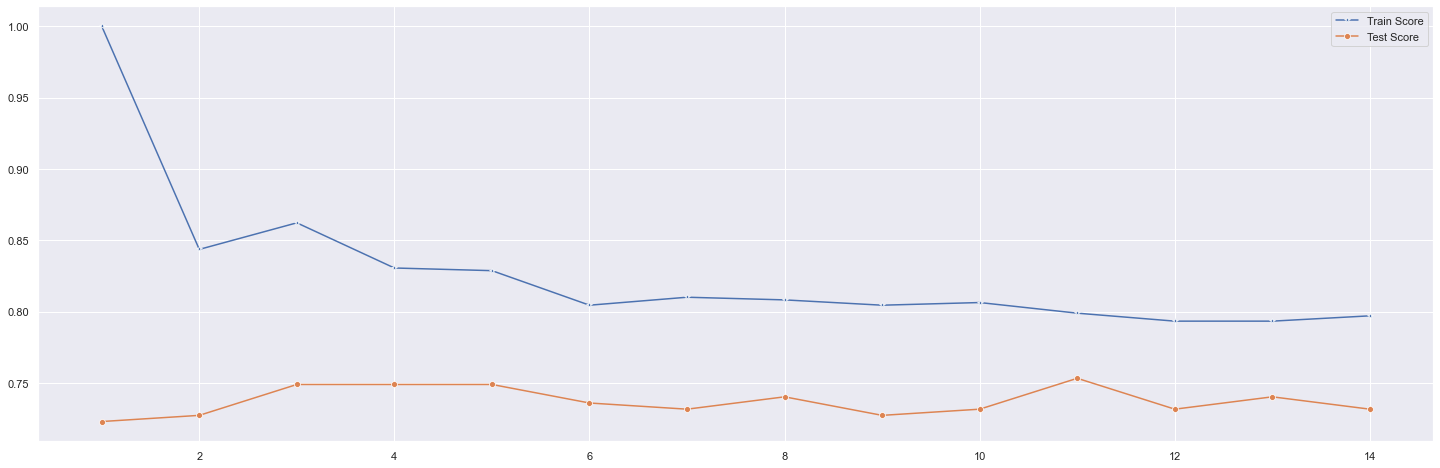

In [207]:
plt.figure(figsize=(25,8))
df = sns.lineplot(range(1,15),training_scores,marker='*',label='Train Score')
df = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

#### The best result is captured at k = 11 hence 11 is used for the final model

In [208]:
#Apply KNN classifier with K Neighbors.
knn = KNeighborsClassifier(11)

knn.fit(x_train,y_train)
knn.score(X_test,y_test)

0.7532467532467533

# Model Performance Analysis

#### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

#### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

#### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

#### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

In [209]:
# Import confusion_matrix.
from sklearn.metrics import confusion_matrix

# Draw predictions using the classifier we had fit above.
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# 0 : Non-Diabetic Patients.
# 1 : Diabetic Patients.

## 0, 0 : True Positive, Non- Diabetic Patients
## 1, 1 : True Negative, Diabetic Patients

### 1, 0 : False Postives, Type 1 Error (23)
### 0, 1 : False Negatives, Type 2 Error (47)

Predicted,0,1,All
True,,,
0,127,23,150
1,34,47,81
All,161,70,231


Text(0.5, 12.5, 'Predicted label')

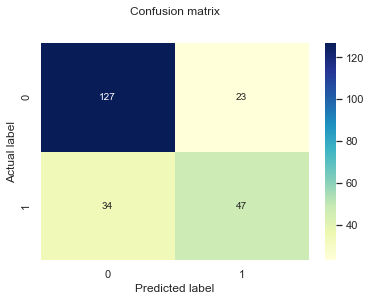

In [210]:
# More visual Confusion Matrix

y_pred = knn.predict(X_test)
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
df = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [211]:
# Import Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# This shows that the objectives had been met as we would want to have High Recall in identifying Diabetic Cases and save more lifes.

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       150
           1       0.67      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



## 3. ROC - AUC
ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two


In [212]:
from sklearn.metrics import roc_curve

# Compute the false positive rate, true positive rate
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

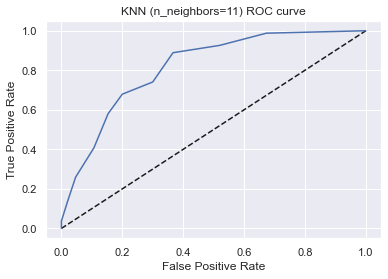

In [213]:
# Plot the result
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN (n_neighbors=11) ROC curve')
plt.show()

In [214]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8152263374485597

# Hyper Parameter Optimization
Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. 

Let’s consider the following example: 

Suppose, a machine learning model X takes hyperparameters a1, a2 and a3. In grid searching, you first define the range of values for each of the hyperparameters a1, a2 and a3. You can think of this as an array of values for each of the hyperparameters. Now the grid search technique will construct many versions of X with all the possible combinations of hyperparameter (a1, a2 and a3) values that you defined in the first place. This range of hyperparameter values is referred to as the grid. 

Suppose, you defined the grid as:
a1 = [0,1,2,3,4,5]
a2 = [10,20,30,40,5,60]
a3 = [105,105,110,115,120,125]

Note that, the array of values of that you are defining for the hyperparameters has to be legitimate in a sense that you cannot supply Floating type values to the array if the hyperparameter only takes Integer values.

Now, grid search will begin its process of constructing several versions of X with the grid that you just defined.

It will start with the combination of [0,10,105], and it will end with [5,60,125]. It will go through all the intermediate combinations between these two which makes grid search computationally very expensive.

In [215]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7721840251252015
Best Parameters: {'n_neighbors': 25}
